In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library**

In [2]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 8.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

**Read Dataset**

In [4]:
dataset = pd.read_excel("/content/drive/MyDrive/Salai/GENESID DATA.xlsx")
dataset.head()

,CSIID,AppName,YEAR,MONTH,DAY,Incidents,Changes
0,163186,GENESIS-,2018,1,1,34,NaN
1,163186,GENESIS-,2018,1,2,92,NaN
2,163186,GENESIS-,2018,1,3,126,NaN
3,163186,GENESIS-,2018,1,4,171,NaN
4,163186,GENESIS-,2018,1,5,169,NaN


In [5]:
dataset.shape

(1460, 7)

In [6]:
# Number of rows
dataset.shape[0] 

1460

In [7]:
# Number of Columns
dataset.shape[1]

7

**Combine YEAR, MONTH & DAY**

In [8]:
dataset["DATE"] = pd.to_datetime(dataset[["YEAR", "MONTH", "DAY"]])
dataset.head()

,CSIID,AppName,YEAR,MONTH,DAY,Incidents,Changes,DATE
0,163186,GENESIS-,2018,1,1,34,NaN,2018-01-01
1,163186,GENESIS-,2018,1,2,92,NaN,2018-01-02
2,163186,GENESIS-,2018,1,3,126,NaN,2018-01-03
3,163186,GENESIS-,2018,1,4,171,NaN,2018-01-04
4,163186,GENESIS-,2018,1,5,169,NaN,2018-01-05


In [9]:
dataset.tail()

,CSIID,AppName,YEAR,MONTH,DAY,Incidents,Changes,DATE
1455,163186,GENESIS-,2021,12,26,25,NaN,2021-12-26
1456,163186,GENESIS-,2021,12,27,89,NaN,2021-12-27
1457,163186,GENESIS-,2021,12,28,76,2.0,2021-12-28
1458,163186,GENESIS-,2021,12,29,58,NaN,2021-12-29
1459,163186,GENESIS-,2021,12,30,62,NaN,2021-12-30


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   CSIID      1460 non-null   int64         
 1   AppName    1460 non-null   object        
 2   YEAR       1460 non-null   int64         
 3   MONTH      1460 non-null   int64         
 4   DAY        1460 non-null   int64         
 5   Incidents  1460 non-null   int64         
 6   Changes    1083 non-null   float64       
 7   DATE       1460 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 91.4+ KB


In [11]:
dataset.set_index("DATE", inplace = True)
dataset.head()

,CSIID,AppName,YEAR,MONTH,DAY,Incidents,Changes
DATE,,,,,,,
2018-01-01,163186,GENESIS-,2018,1,1,34,NaN
2018-01-02,163186,GENESIS-,2018,1,2,92,NaN
2018-01-03,163186,GENESIS-,2018,1,3,126,NaN
2018-01-04,163186,GENESIS-,2018,1,4,171,NaN
2018-01-05,163186,GENESIS-,2018,1,5,169,NaN


In [12]:
data = dataset.copy()
data.head()

,CSIID,AppName,YEAR,MONTH,DAY,Incidents,Changes
DATE,,,,,,,
2018-01-01,163186,GENESIS-,2018,1,1,34,NaN
2018-01-02,163186,GENESIS-,2018,1,2,92,NaN
2018-01-03,163186,GENESIS-,2018,1,3,126,NaN
2018-01-04,163186,GENESIS-,2018,1,4,171,NaN
2018-01-05,163186,GENESIS-,2018,1,5,169,NaN


In [13]:
data.columns

Index(['CSIID', 'AppName', 'YEAR', 'MONTH', 'DAY', 'Incidents', 'Changes'], dtype='object')

In [14]:
data.drop(["CSIID",'AppName','YEAR', 'MONTH', 'DAY','Changes'], inplace = True, axis = 1)
data.head()

,Incidents
DATE,
2018-01-01,34
2018-01-02,92
2018-01-03,126
2018-01-04,171
2018-01-05,169


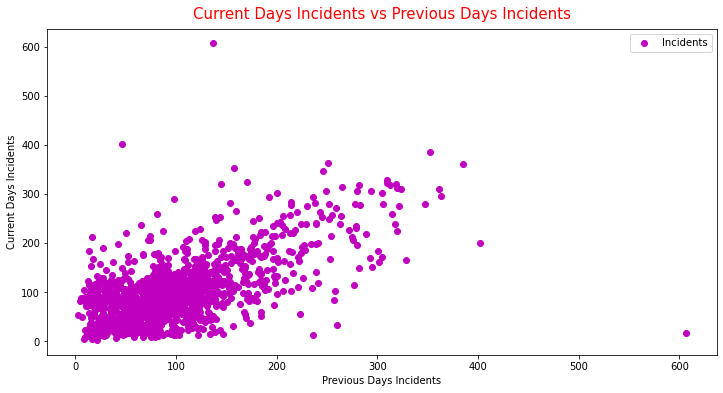

In [15]:
from IPython.core.pylabtools import figsize
from pandas.plotting import lag_plot
plt.figure(figsize = (12, 6))
lag_plot(data, c = 'm', label = 'Incidents')
plt.legend()
plt.xlabel('Previous Days Incidents')
plt.ylabel('Current Days Incidents')
plt.title('Current Days Incidents vs Previous Days Incidents', color = 'red', size = 15, pad = 10)
plt.show();

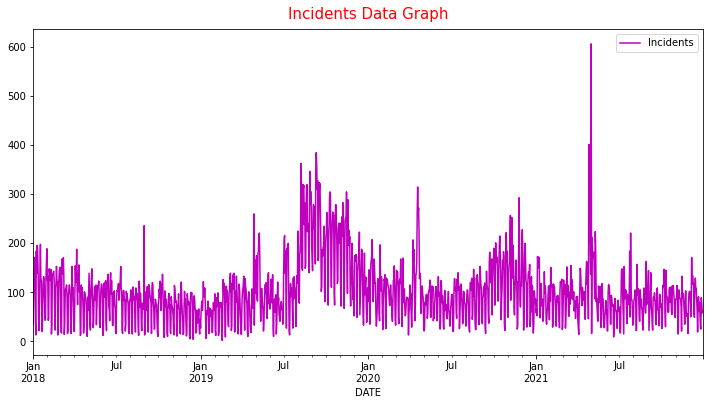

In [16]:
data["Incidents"].plot(figsize = (12,6), c = "m", label = "Incidents")
plt.title('Incidents Data Graph', color = 'red', size = 15, pad = 10)
plt.legend();

**Check for Stationary**

In [17]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
dftest = adfuller(data['Incidents'], autolag = 'AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1]) # if P-Value is less than 0.5, it's stationary otherwise not stationary
print("3. Num of Lags : ", dftest[2])

1. ADF :  -3.2237947375656946
2. P-Value :  0.018648005262243725
3. Num of Lags :  22


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


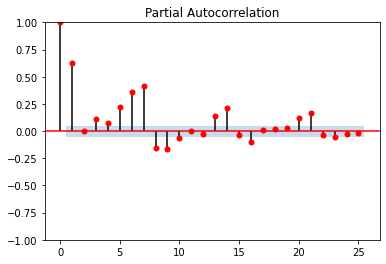

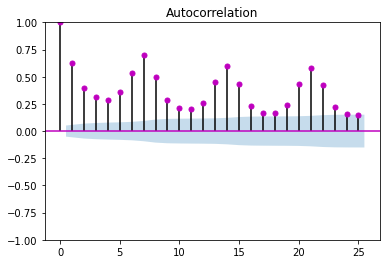

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(data['Incidents'], lags = 25, c = 'r')
acf = plot_acf(data['Incidents'], lags = 25, c = 'm');

In [19]:
len(data)

1460

In [20]:
X = data.values
X

array([[ 34],
       [ 92],
       [126],
       ...,
       [ 76],
       [ 58],
       [ 62]])

**Split Dataset intro Train & Test: Testing : Last 30 days**

In [21]:
train = X[:len(X)-30]
test = X[len(X)-30:]

In [22]:
model = AutoReg(train, lags = 20).fit()

In [23]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1430
Model:                    AutoReg(20)   Log Likelihood               -7102.634
Method:               Conditional MLE   S.D. of innovations             37.278
Date:                Sun, 07 Aug 2022   AIC                          14249.268
Time:                        06:17:31   BIC                          14364.797
Sample:                            20   HQIC                         14292.440
                                 1430                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1530      2.608      3.126      0.002       3.041      13.265
y.L1           0.3775      0.026     14.270      0.000       0.326       0.429
y.L2           0.0905      0.028      3.199      0.0

In [24]:
print(len(train))

1430


**Make Predictions on Test Set and Compare**

In [25]:
pred = model.predict(start = len(train), end = len(X)-1, dynamic = False)

[ 71.44608055  71.95553231  69.88478985  51.72659026  47.99588082
  79.72529921 102.02878842  85.64321721  73.95027882  74.8816264
  61.71125633  54.75972648  83.94860871 100.54899291  85.67328551
  77.45372836  76.58263713  60.57712227  60.22586006  84.42278189
  97.88135174  88.64699524  79.72426442  76.57335737  65.62297933
  65.53447058  86.75805741  98.64695739  90.31428489  83.13145346]


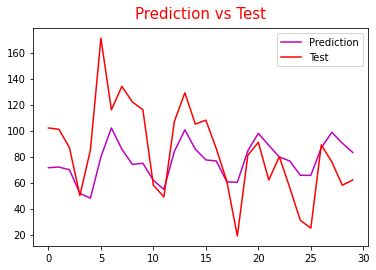

In [26]:
plt.plot(pred, color = "m", label = "Prediction")
plt.plot(test, color = 'red', label = "Test")
plt.title('Prediction vs Test', color = 'red', size = 15, pad = 10)
plt.legend();
print(pred)

**Calculate Root mean Square error for AR model**

In [27]:
root_mean_square_error = sqrt(mean_squared_error(test, pred))
print(root_mean_square_error)

31.001190409204458


**Making Future Prediction**

In [28]:
pred_future = model.predict(start = len(X)+1, end = len(X)+30, dynamic = False)
print(f"The Futue prediction for the next month : \n {pred_future}")

The Futue prediction for the next month : 
 [69.13001181 70.66109121 88.83802826 98.64174871 92.40746932 85.69590464
 80.38962529 72.38779994 74.55398905 90.11383599 98.80254962 93.56452936
 87.36365185 81.99278386 75.11490153 77.8639908  91.42583007 98.82780536
 94.75690012 89.02647866 83.42433336 77.73065618 80.79084891 92.56533245
 99.07135932 95.76083595 90.33658223 84.86745444 80.07751798 83.25893879]


**For LSTM model**

In [29]:
data.head(), data.tail()

(            Incidents
 DATE                 
 2018-01-01         34
 2018-01-02         92
 2018-01-03        126
 2018-01-04        171
 2018-01-05        169,             Incidents
 DATE                 
 2021-12-26         25
 2021-12-27         89
 2021-12-28         76
 2021-12-29         58
 2021-12-30         62)

**Split train & test data**

In [30]:
train = data.iloc[:len(data)-30]
test = data.iloc[len(data)-30:]

In [31]:
train.head()

,Incidents
DATE,
2018-01-01,34
2018-01-02,92
2018-01-03,126
2018-01-04,171
2018-01-05,169


In [32]:
# Data preprocessing 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [34]:
scaled_train[:10]

array([[0.05289256],
       [0.14876033],
       [0.20495868],
       [0.27933884],
       [0.27603306],
       [0.07438017],
       [0.01818182],
       [0.30082645],
       [0.22644628],
       [0.32066116]])

In [35]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [36]:
#define generator
n_input = 3 # number of previous value consider for next future value prediction
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size= 1)

In [37]:
X,y = generator[0]
print(f"Given the array: \n{X.flatten()}")
print(f"Predict this y:\n{y}")

Given the array: 
[0.05289256 0.14876033 0.20495868]
Predict this y:
[[0.27933884]]


In [38]:
X.shape

(1, 3, 1)

In [39]:
# We do same thing, but now for 30 days
n_input = 30
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size= 1)

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [41]:
#Define Model
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer="adam", loss = 'mse')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [43]:
#fit model
model.fit(generator, epochs = 50)

Epoch 1/50
1400/1400 [==============================] - 31s 21ms/step - loss: 0.0080
Epoch 2/50
1400/1400 [==============================] - 16s 12ms/step - loss: 0.0072
Epoch 3/50
1400/1400 [==============================] - 16s 11ms/step - loss: 0.0066
Epoch 4/50
1400/1400 [==============================] - 16s 12ms/step - loss: 0.0057
Epoch 5/50
1400/1400 [==============================] - 19s 13ms/step - loss: 0.0052
Epoch 6/50
1400/1400 [==============================] - 16s 12ms/step - loss: 0.0051
Epoch 7/50
1400/1400 [==============================] - 16s 12ms/step - loss: 0.0049
Epoch 8/50
1400/1400 [==============================] - 16s 12ms/step - loss: 0.0048
Epoch 9/50
1400/1400 [==============================] - 19s 13ms/step - loss: 0.0047
Epoch 10/50
1400/1400 [==============================] - 25s 18ms/step - loss: 0.0045
Epoch 11/50
1400/1400 [==============================] - 18s 13ms/step - loss: 0.0044
Epoch 12/50
1400/1400 [==============================] - 16s 12

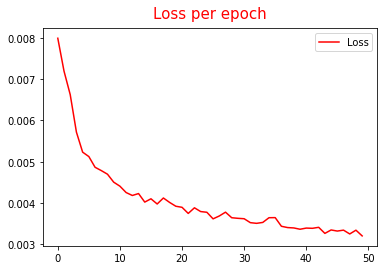

In [44]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch, c = "r", label = "Loss")
plt.title('Loss per epoch', color = 'red', size = 15, pad = 10)
plt.legend()

In [45]:
last_train_batch = scaled_train[-30:]

In [46]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [47]:
model.predict(last_train_batch)

array([[0.1328612]], dtype=float32)

In [48]:
scaled_test[0]

array([0.16528926])

In [49]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

  #get the prediction value for the first batch
  current_pred = model.predict(current_batch)[0]

  # Append the prediction into the list
  test_predictions.append(current_pred)

  # Use the prediction to update the batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

In [50]:
test_predictions

[array([0.1328612], dtype=float32),
 array([0.1486592], dtype=float32),
 array([0.14830065], dtype=float32),
 array([0.08545218], dtype=float32),
 array([0.05350645], dtype=float32),
 array([0.14060317], dtype=float32),
 array([0.16529953], dtype=float32),
 array([0.1615423], dtype=float32),
 array([0.16488999], dtype=float32),
 array([0.15798403], dtype=float32),
 array([0.09069101], dtype=float32),
 array([0.0550134], dtype=float32),
 array([0.13140947], dtype=float32),
 array([0.17352429], dtype=float32),
 array([0.16606984], dtype=float32),
 array([0.17655028], dtype=float32),
 array([0.1708273], dtype=float32),
 array([0.09930233], dtype=float32),
 array([0.05155802], dtype=float32),
 array([0.1182306], dtype=float32),
 array([0.17988381], dtype=float32),
 array([0.16963163], dtype=float32),
 array([0.18242142], dtype=float32),
 array([0.17791986], dtype=float32),
 array([0.11012191], dtype=float32),
 array([0.05052087], dtype=float32),
 array([0.10114983], dtype=float32),
 array(

In [51]:
true_predictions = scaler.inverse_transform(test_predictions)

In [57]:
test["Predictions"] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
test.head()

,Incidents,Predictions
DATE,,
2021-12-01,102,82.381024
2021-12-02,101,91.938816
2021-12-03,87,91.721892
2021-12-04,50,53.698567
2021-12-05,85,34.371402


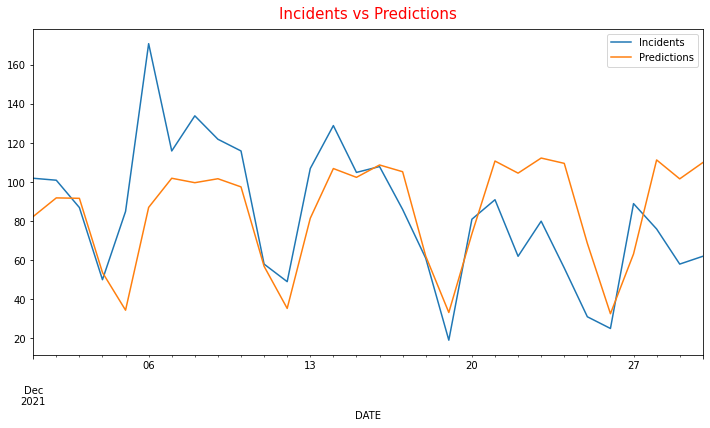

In [53]:
test.plot(figsize = (12,6),)
plt.title('Incidents vs Predictions', color = 'red', size = 15, pad = 10);

**Calculate Root mean Square error LSTM model**

In [54]:
root_mean_square_error = sqrt(mean_squared_error(test['Incidents'], test["Predictions"]))
print(root_mean_square_error)

30.51684105030696
